In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
crime_data = pd.read_csv("http://cluster.earlham.edu/~apc0013/Chicago_crime.csv")
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [3]:
crime_data.shape

(6836023, 22)

In [4]:
crime_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [11]:
crime_type = crime_data.groupby([crime_data['Primary Type']]).size().sort_values(ascending=False)
crime_type

Primary Type
THEFT                                1439300
BATTERY                              1248292
CRIMINAL DAMAGE                       780015
NARCOTICS                             716044
ASSAULT                               425168
OTHER OFFENSE                         424663
BURGLARY                              391519
MOTOR VEHICLE THEFT                   317528
DECEPTIVE PRACTICE                    269615
ROBBERY                               258515
CRIMINAL TRESPASS                     195678
WEAPONS VIOLATION                      72568
PROSTITUTION                           68549
PUBLIC PEACE VIOLATION                 48274
OFFENSE INVOLVING CHILDREN             46227
CRIM SEXUAL ASSAULT                    27802
SEX OFFENSE                            25563
INTERFERENCE WITH PUBLIC OFFICER       15584
GAMBLING                               14437
LIQUOR LAW VIOLATION                   14125
ARSON                                  11275
HOMICIDE                                95

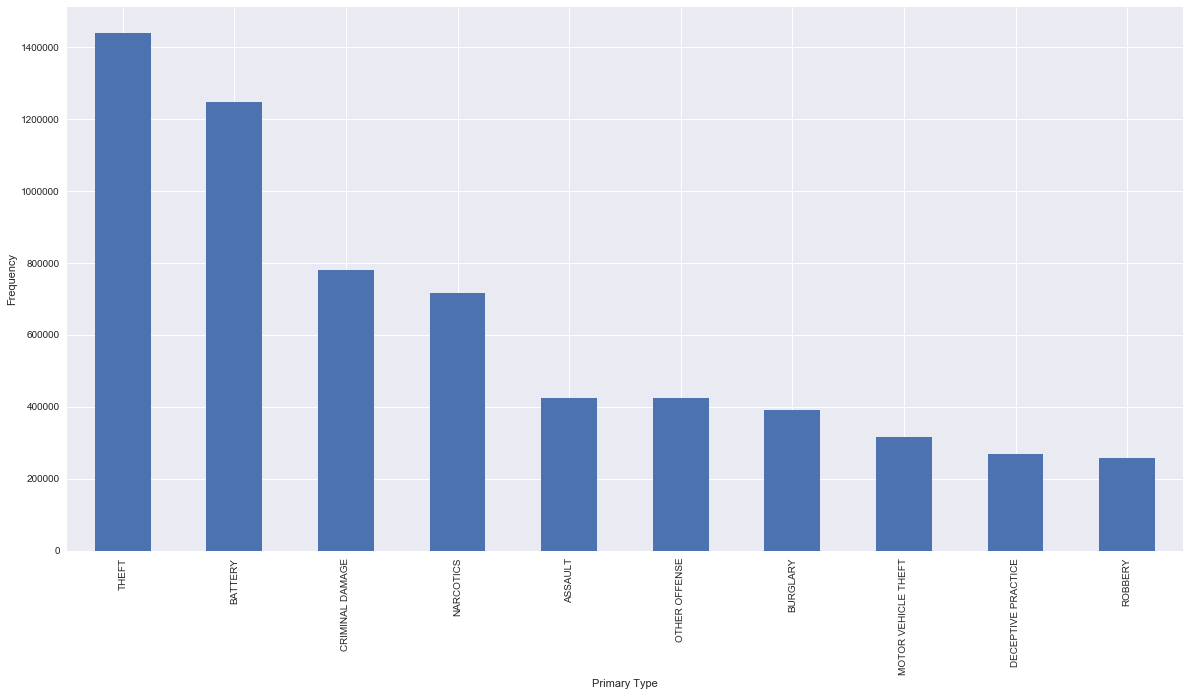

In [13]:
plt.figure(figsize=(20,10))
plt.ylabel('Frequency')
plt.xlabel('Type of Offence')
crime_type = crime_data.groupby([crime_data['Primary Type']]).size().sort_values(ascending=False).head(10)
crime_type.plot(kind='bar', style='seaborn-paper')

In [7]:
#convert dates to pandas datetime format
# crime_data.Date = pd.to_datetime(crime_data.Date, format='%m/%d/%Y %I:%M:%S %p')
# crime_data.Date = pd.DatetimeIndex(crime_data.Date)

In [8]:
theft = crime_data[crime_data["Primary Type"]== 'THEFT']
theft.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"
6,2746421,HJ377410,05/15/2003 01:30:00 PM,020XX W ADAMS ST,0850,THEFT,ATTEMPT THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,...,2.0,28.0,06,1162662.0,1899079.0,2003,02/28/2018 03:56:25 PM,41.878727,-87.678199,"(41.878726928, -87.678199026)"
11,2746428,HJ383679,05/23/2003 10:30:00 PM,012XX W ADAMS ST,0890,THEFT,FROM BUILDING,OTHER,False,False,...,27.0,28.0,06,1168253.0,1899240.0,2003,02/28/2018 03:56:25 PM,41.879050,-87.657665,"(41.879049777, -87.657665406)"
18,2746437,HJ384029,05/23/2003 06:00:00 PM,009XX W SCHUBERT AVE,0810,THEFT,OVER $500,STREET,False,False,...,43.0,7.0,06,1169332.0,1918120.0,2003,02/28/2018 03:56:25 PM,41.930834,-87.653154,"(41.930834258, -87.653153852)"


In [9]:
t_G = theft.groupby([theft['Location Description']]).size().sort_values(ascending=False)
t_G

Location Description
STREET                                                   393297
RESIDENCE                                                150489
OTHER                                                     82079
PARKING LOT/GARAGE(NON.RESID.)                            72662
DEPARTMENT STORE                                          70542
APARTMENT                                                 69966
SMALL RETAIL STORE                                        68651
GROCERY FOOD STORE                                        56920
SIDEWALK                                                  45920
RESTAURANT                                                40547
VEHICLE NON-COMMERCIAL                                    36596
RESIDENTIAL YARD (FRONT/BACK)                             26529
SCHOOL, PUBLIC, BUILDING                                  25427
RESIDENCE PORCH/HALLWAY                                   23548
DRUG STORE                                                22224
GAS STATION        

Text(0, 0.5, 'Frequency')

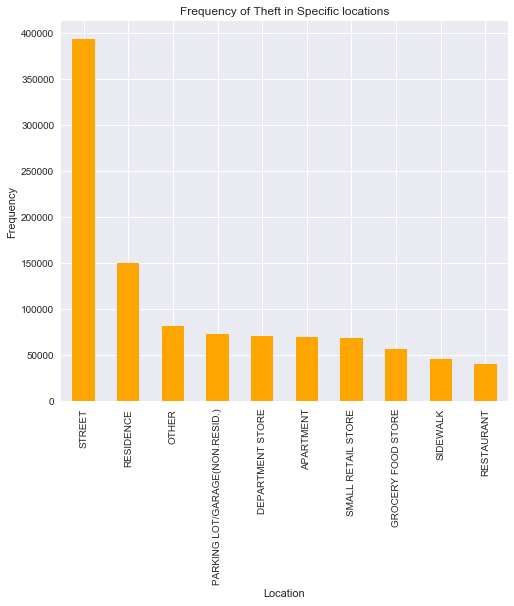

In [10]:
header = t_G.head(10)
fig = plt.figure(figsize = (8, 7)) 
ax = fig.gca() 
header.plot.bar(color = 'Orange', ax = ax) 
ax.set_title("Frequency of Theft in Specific locations") 
ax.set_xlabel("Location") 
ax.set_ylabel("Frequency") 